In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
sb.set_context("talk")
import sys
print('python', sys.version)
print('pandas', pd.__version__)
print('statsmodels', sm.version.full_version)

Populating the interactive namespace from numpy and matplotlib
python 3.4.1 (default, May 19 2014, 13:10:29) 
[GCC 4.2.1 Compatible Apple LLVM 5.1 (clang-503.0.40)]
pandas 0.16.0
statsmodels 0.6.1


In [104]:
ss = pd.read_csv("https://raw.githubusercontent.com/wilsonfreitas/saosilvestre/master/saosilvestre-lf.csv")

In [105]:
ss = ss.drop(['largada', 'chegada', 'horario'], 1)
ss.head()

,nome,pais,corrida,ano,tempo,percurso,data,pace,sexo
0,Alfredo Gomes,Brasil,1,1925,23.166667,6200,1925-12-31 12:00:00,3.736559,masculino
1,Jorge Mancebo,Brasil,2,1926,22.533333,6200,1926-12-31 12:00:00,3.634409,masculino
2,Heitor Blasi,Itália,3,1927,23.000000,6200,1927-12-31 12:00:00,3.709677,masculino
3,Salim Maluf,Brasil,4,1928,29.183333,8800,1928-12-31 12:00:00,3.316288,masculino
4,Heitor Blasi,Itália,5,1929,29.183333,8800,1929-12-31 12:00:00,3.316288,masculino


## Explorando o pace

Fazendo gráficos com *pace*

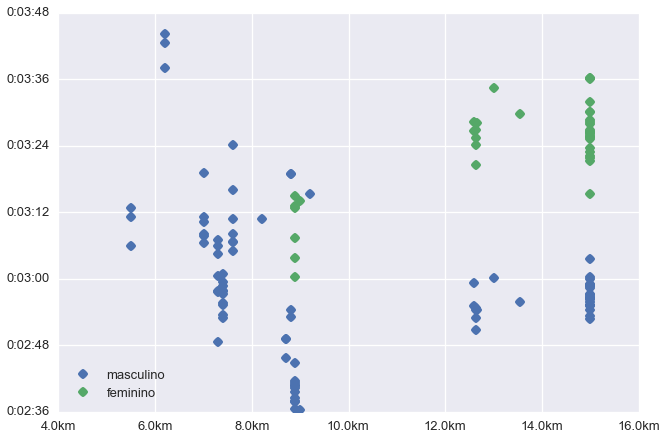

In [49]:
ss_pace = ss[['sexo', 'ano', 'pace', 'percurso']]

mas = ss_pace.query('sexo == "masculino"')
fem = ss_pace.query('sexo == "feminino"')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(mas.percurso, mas.pace, 'o', label='masculino')
ax.plot(fem.percurso, fem.pace, 'o', label='feminino')

dist_fmt = matplotlib.ticker.FuncFormatter(lambda x, p: str(x/1000) + "km")
pace_fmt = matplotlib.ticker.FuncFormatter(lambda x, p: str(datetime.timedelta(minutes=x)))

ax.xaxis.set_major_formatter(dist_fmt)
ax.yaxis.set_major_formatter(pace_fmt)

plt.legend(loc=3)
plt.show()

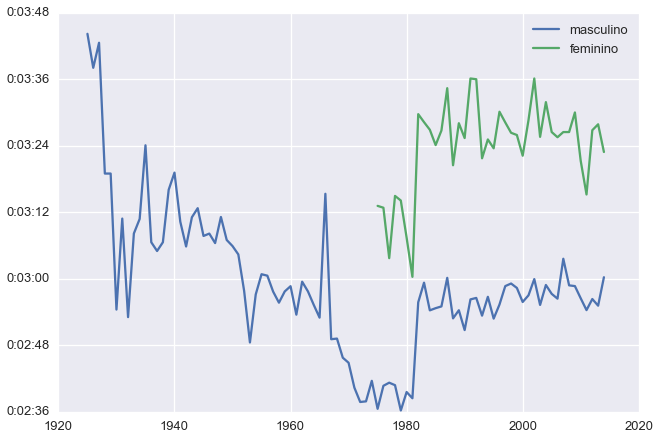

In [54]:
ss_long = ss #.query('percurso >= 12000')

mas = ss_long.query('sexo == "masculino"')
fem = ss_long.query('sexo == "feminino"')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(mas.ano, mas.pace, label='masculino')
ax.plot(fem.ano, fem.pace, label='feminino')

pace_fmt = matplotlib.ticker.FuncFormatter(lambda x, p: str(datetime.timedelta(minutes=x)))

ax.yaxis.set_major_formatter(pace_fmt)

plt.legend()
plt.show()